# 导库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

D:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 将股票数据收盘价(close)进行可视化展示

In [2]:
data = pd.read_csv("./zgpa_train.csv")
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [3]:
data.shape

(731, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    731 non-null    object 
 1   open    731 non-null    float64
 2   high    731 non-null    float64
 3   low     731 non-null    float64
 4   close   731 non-null    float64
 5   volume  731 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 34.4+ KB


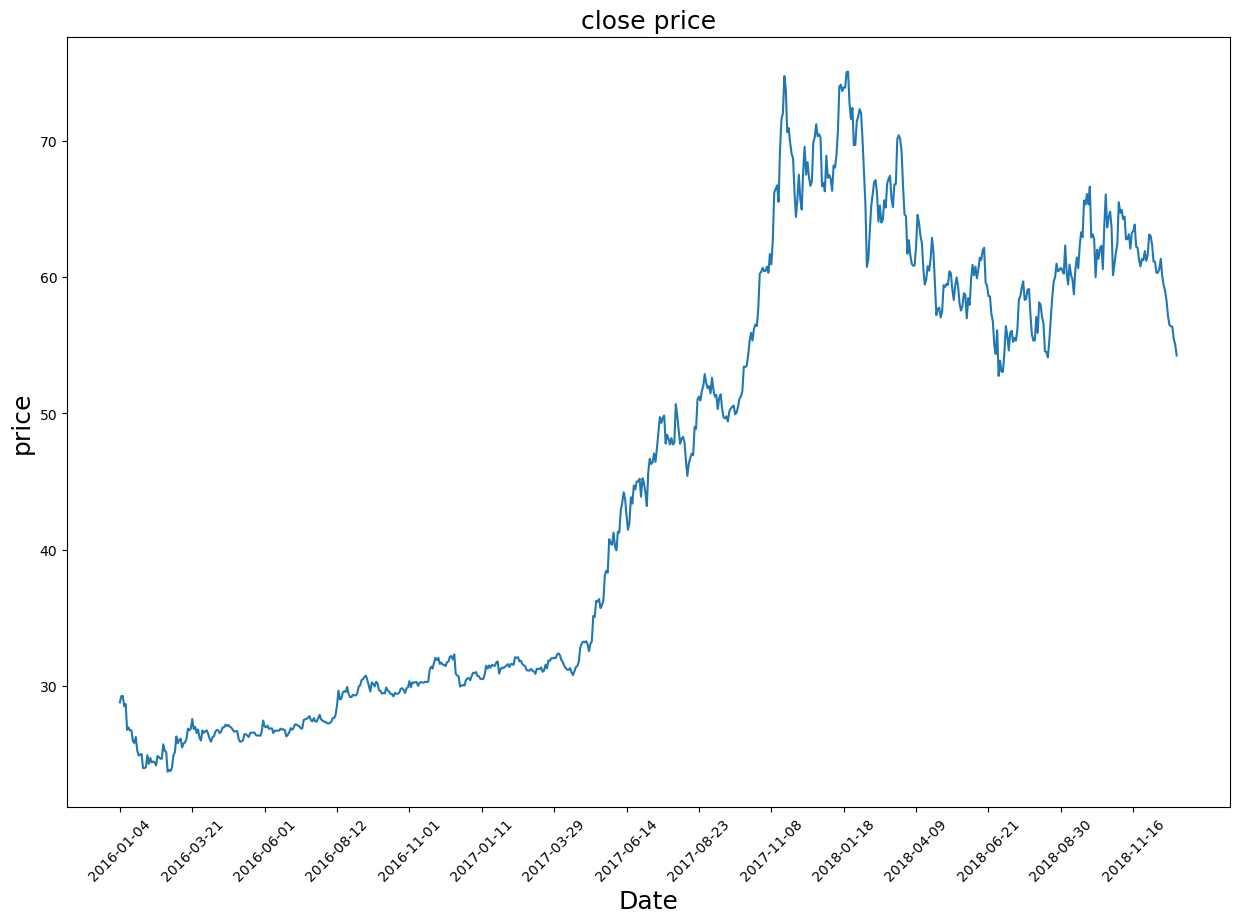

In [5]:
plt.figure(figsize=(15,10),dpi=100)
plt.plot(data['close'])
plt.xticks(range(0, data.shape[0], 50), data['date'].loc[::50], rotation=45)
plt.xlabel("Date",fontsize=18)
plt.ylabel("price",fontsize=18)
plt.title("close price",fontsize=18)

plt.show()


# 特征工程

In [6]:
# 对price进行归一化操作
price = data['close']
price_norm = (price-min(price))/(max(price)-min(price))
print(price_norm)

0      0.099027
1      0.107782
2      0.108366
3      0.093580
4      0.096887
         ...   
726    0.636381
727    0.635603
728    0.617899
729    0.610117
730    0.594553
Name: close, Length: 731, dtype: float64


# 制作数据集

In [7]:
def extract_data(data,time_step):
    X  = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0],X.shape[1],1)
    return X,y
    

In [8]:
time_step = 8
X_train_norm,y_train_norm = extract_data(price_norm,time_step)

In [9]:
X_train_norm.shape

(723, 8, 1)

In [10]:
y_train_norm.shape

(723,)

# 构建模型

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units=5, input_shape=(time_step,1),activation='relu'),
    tf.keras.layers.Dense(units=1,activation='linear')
])

D:\Anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 激活模型

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                 ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)       │ (None, 5)            │          35 │
├──────────────────────────────┼──────────────────────┼─────────────┤
│ dense (Dense)                │ (None, 1)            │           6 │
└──────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

# 训练模型

In [13]:
model.fit(X_train_norm,y_train_norm,batch_size=30,epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2131   
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011     
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6599e-04 
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4796e-04 
Epoch 13/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5187e-04
Epoch 14/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6440e-04
Epoch 15/200
25/25 ━━━━━━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7169e-04
Epoch 79/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5353e-04 
Epoch 80/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4487e-04 
Epoch 81/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6501e-04 
Epoch 82/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8618e-04 
Epoch 83/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3972e-04 
Epoch 84/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8262e-04 
Epoch 85/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6558e-04 
Epoch 86/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4794e-04
Epoch 87/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6512e-04 
Epoch 88/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8293e-04 
Epoch 89/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0557e-04 
Epoch 90/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1905e-04 
Epoch 91/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4933e-04 
Epoch 9

Epoch 155/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7637e-04 
Epoch 156/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0732e-04 
Epoch 157/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4841e-04 
Epoch 158/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8899e-04 
Epoch 159/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9623e-04  
Epoch 160/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8404e-04  
Epoch 161/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6131e-04 
Epoch 162/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0482e-04 
Epoch 163/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3306e-04 
Epoch 164/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5911e-04 
Epoch 165/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1155e-04 
Epoch 166/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5766e-04 
Epoch 167/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7981e-04 
Epoch 168/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

# 对训练集进行预测

In [14]:
y_train_predict = model.predict(X_train_norm) * (max(price)-min(price))+ min(price)
y_train = y_train_norm * (max(price)-min(price))+ min(price)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


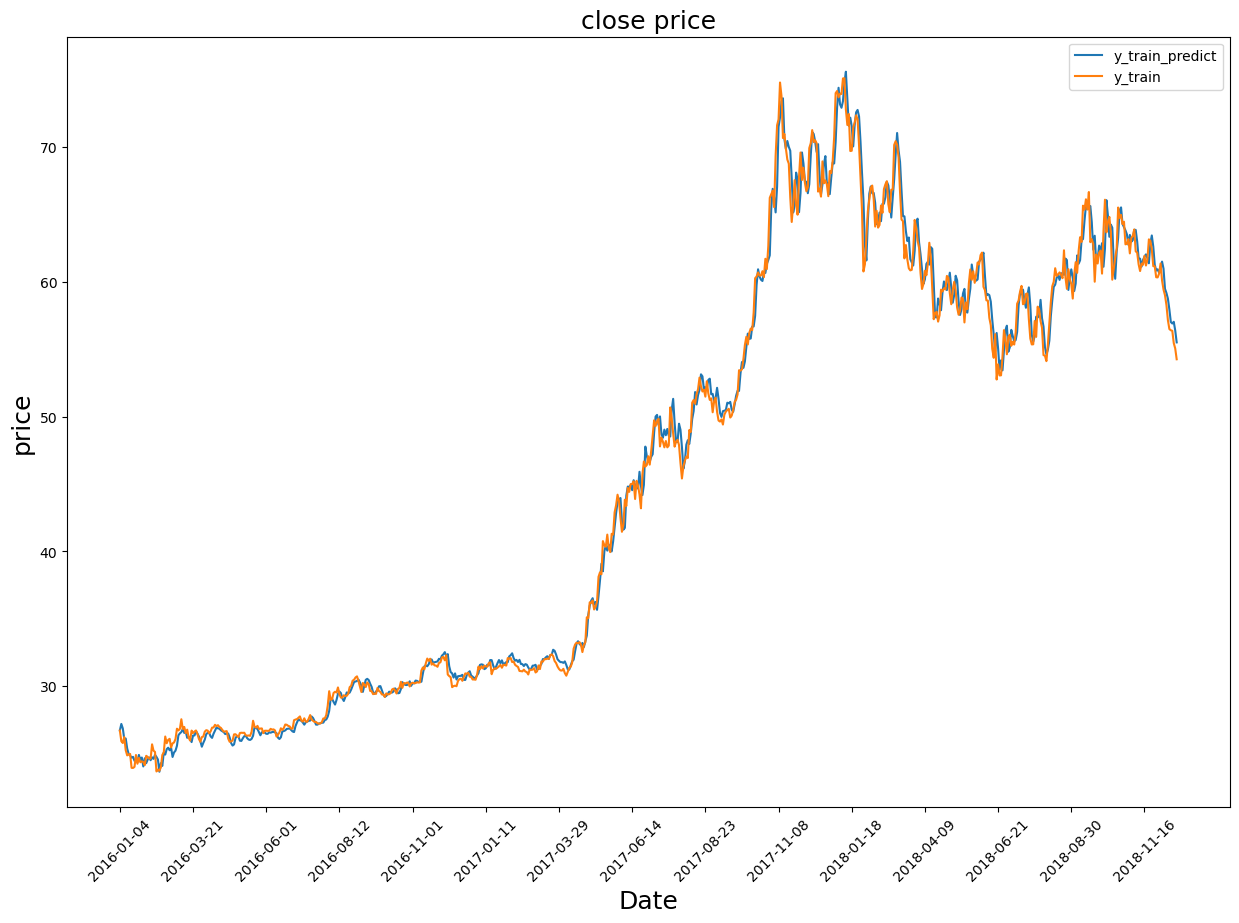

In [15]:
plt.figure(figsize=(15,10),dpi=100)
plt.plot(y_train_predict,label="y_train_predict")
plt.plot(y_train,label="y_train")
plt.xticks(range(0, data.shape[0], 50), data['date'].loc[::50], rotation=45)
plt.xlabel("Date",fontsize=18)
plt.ylabel("price",fontsize=18)
plt.title("close price",fontsize=18)
plt.legend()

plt.show()

# 在测试集上进行测试

In [16]:
data_test = pd.read_csv("./zgpa_test.csv")
data_test.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2020-07-24,78.88,78.89,77.00,76.38,1072693.38,-2.00,-2.53,79.898,79.961,79.539,1002925.93,1029867.65,1261360.37
1,2020-07-23,79.00,79.88,79.00,78.02,782100.44,-0.93,-1.16,80.102,80.495,79.302,963394.30,1069260.28,1237982.51
2,2020-07-22,80.21,81.85,79.93,79.44,877513.25,-0.83,-1.03,79.946,81.187,78.950,1070608.21,1133509.96,1237859.29
3,2020-07-21,82.95,83.20,80.76,80.37,904774.81,-2.04,-2.46,80.004,81.763,78.592,1079659.15,1215397.62,1227575.20
4,2020-07-20,79.05,82.82,82.80,79.05,1377547.75,4.78,6.13,80.112,82.009,78.225,1096415.78,1347124.29,1214135.95


In [17]:
data_test.shape

(135, 14)

In [18]:
# 特征提取
price_test = data_test["close"]
price_test_norm = (price_test-min(price))/(max(price)-min(price))

In [19]:
# 处理数据
X_test_norm, y_test_norm = extract_data(price_test_norm,time_step)
X_test_norm.shape


(127, 8, 1)

In [20]:
y_test_norm.shape

(127,)

In [21]:
y_test_predict = model.predict(X_test_norm) * (max(price)-min(price))+ min(price)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [22]:
y_test = np.array(y_test_norm) * (max(price)-min(price))+ min(price)

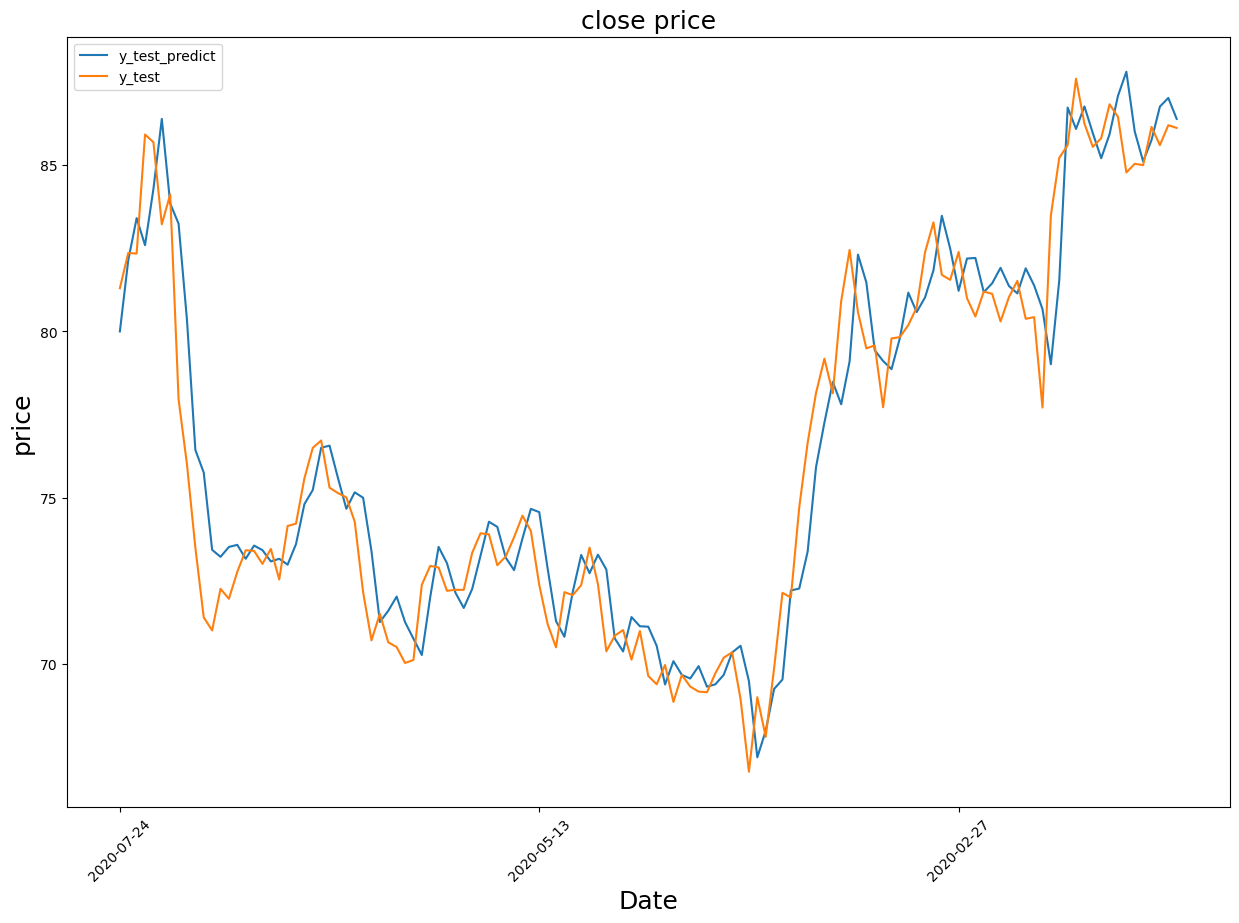

In [23]:
plt.figure(figsize=(15,10),dpi=100)
plt.plot(y_test_predict,label="y_test_predict")
plt.plot(y_test,label="y_test")
plt.xticks(range(0, data_test.shape[0], 50), data_test['date'].loc[::50], rotation=45)
plt.xlabel("Date",fontsize=18)
plt.ylabel("price",fontsize=18)
plt.title("close price",fontsize=18)
plt.legend()

plt.show()